# Configuration<a class="anchor" id="CONFIG"></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%autosave 5

# necessary modules -------------------------------------------------------------------------------------
import sys
import os
sys.path.append('/home/ollie/loziel/pyfesom2/codes/py_f2recom_develop/modules/')
import pyfesom2 as pf
sys.path.append('/home/ollie/loziel/pyfesom2/codes/py_f2recom_develop/modules/SkillMetrics/')
import skill_metrics as sm
sys.path.append('/home/ollie/loziel/pyfesom2/codes/py_f2recom_develop/modules/cmocean-master/')
import cmocean as cmo


sys.path.append('../GlobalAssessment/')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import time
from datetime import date
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from netCDF4 import Dataset

Autosaving every 5 seconds


In [2]:
#    Only modify parameters and paths in this cell       #
#  In principle, you don't have to modify anything else  #

# run specification -------------------------------------------------------------------------------------   
runid      =  'fesom'

# defines paths ----------------------------------------------------------------------------------------- 

resultpath = '/work/ollie/chinrich/fesom2_recom/run_alk_restore_off_CTL/'
savepath = '/home/ollie/chinrich/FIGURES_Alk_experiment_CTL/'
simu_name = 'fesom2.1-recom_alk-restore-off_CTL'

# # period of analysis ------------------------------------------------------------------------------------
first_year_maps = 2020

first_year = 1960
last_year  = 2020

runname = simu_name

meshpath = '/work/ollie/mozeisin/mesh/mesh_fesom2.0/core2_meanz'


    
years = np.arange(first_year,last_year+1,1)
years_last10 = np.arange(first_year_maps,last_year+1,1)

# specification of analysis ------------------------------------------------------------------------------------
layerwise = False
depths = (0,50,200,1000,2000) # If layerwise is True, you can define depths here, by defaut: (0,50,200,1000,2000,4000)
depth_limit = 50
mapproj = 'pc'
#Map projection. Options are Mercator (merc), Plate Carree (pc),
#North Polar Stereo (np), South Polar Stereo (sp),  Robinson (rob)
#Robinson projection is quite time consuming.

# export of analysis ------------------------------------------------------------------------------------
savefig = False
verbose = False

today = date.today().strftime("_%Y_%m_%d")
htmlname     =  simu_name+'_'+ today +'.html'
htmlpath = savepath

if not os.path.exists(htmlpath): # create folders if do not exist
    os.makedirs(htmlpath)
if not os.path.exists(savepath):
    os.makedirs(savepath)

In [3]:
# initialization file specifications -----------------------------------------------------------

evalpath      = '/work/ollie/projects/MarESys/evaluation/'
evalpath2      = '/work/ollie/ogurses/input/corrected_input/'

ncfileAlk                = evalpath2+'GLODAPv2.2016b.TAlk_mmol.nc'
ncfileDIC                = evalpath2+'GLODAPv2.2016b.TCO2_mmol.nc'
ncfileDSi                = evalpath2+'woa13_all_i00_01_fesom2.nc'
ncfileDIN                = evalpath2+'woa13_all_n00_01_fesom2.nc'
ncfileDO2                = evalpath2+'woa18_all_o00_01_mmol_fesom2.nc'
ncfileDFe                = evalpath2+'fe_pisces_opa_eq_init_3D_changed_name.nc' 
ncfileNPPTotalGlobal     = evalpath+'fesom.initial.mesh.diag.nc'
ncfileCO2fluxTotalGlobal = evalpath+'fesom.initial.mesh.diag.nc'
ncfileTemp               = evalpath2+'woa18_decav_t00_01_fesom2.nc'
ncfileSal                = evalpath2+'woa18_decav_s00_01_fesom2.nc'
ncfilePHC3               = evalpath2+'phc3.0_annual.nc'      
ncfilepCO2               = evalpath+'SOCATv6_tracks_gridded_monthly.nc'
ncfileMLD                = evalpath+'mld_DR003.nc'
matfileChlsurf           = evalpath+'climatology_annual_chl_1deg_OCCCI_2012_2015.mat'
txtfileCO2flux           = evalpath+'CO2_flux2015_Takahashietal2009_original.txt'
ncfileMaredat            = evalpath+'MarEDat20120716Diatoms.nc'
ncfileJohnson2013        = evalpath+'Johnson2013_MEAN_1x1_Chl_mg_m3.npy'
matfileNPPvgpn           = evalpath+'VGPN_CLIM.mat'
matfileNPPcpbm           = evalpath+'CBPM_CLIM.mat'
matfileMLD               = evalpath+'GlobalML_Climato_1970_2018.mat'


print('Processing years {4} to {5}\n\nReading out of {0}\nStoring graphs to {1}\nStoring html to {2} as {3}'.format(
    resultpath, savepath, htmlpath, htmlname,years[0],years[-1]))

# just to check
if(verbose):
    print('\nLast ten years are \n{0}'.format(years_last10))
    
# mesh initialization -----------------------------------------------------------
mesh = pf.load_mesh(meshpath)

if False: # check mesh setup nodal and area
    print(mesh)
    print('with depth levels:')
    print(mesh.zlev)
    
    print('\n\nFESOM mesh.diag:')
    meshdiag=resultpath+'/'+runid+'.mesh.diag.nc'
    #!ncdump -h $meshdiag

    diag = pf.get_meshdiag(mesh,meshdiag=meshdiag, runid=runid)
    print(diag)
    print('depth of layers:')
    mesh_depths = diag['nz1'].values
    #print(mesh_depths)
    
    nod_area = diag.nod_area
    nod_area.load()
    #print(np.shape(nod_area[:,:]), type(nod_area)) 

if(verbose):
    print(mesh_depths)
    print(diag)

Processing years 1960 to 2020

Reading out of /work/ollie/chinrich/fesom2_recom/run_alk_restore_off_CTL/
Storing graphs to /home/ollie/chinrich/FIGURES_Alk_experiment_CTL/
Storing html to /home/ollie/chinrich/FIGURES_Alk_experiment_CTL/ as fesom2.1-recom_alk-restore-off_CTL__2022_06_09.html
/work/ollie/mozeisin/mesh/mesh_fesom2.0/core2_meanz/pickle_mesh_py3_fesom2
The usepickle == True)
The pickle file for FESOM2 exists.
The mesh will be loaded from /work/ollie/mozeisin/mesh/mesh_fesom2.0/core2_meanz/pickle_mesh_py3_fesom2


# 2. Physical fields<a class="anchor" id="PHYSICS"></a>

## 2.1 Maps<a class="anchor" id="PHYMAPS"></a>

### 2.1.2 Salinity<a class="anchor" id="SAL"></a>

#### PHC3<a class="anchor" id="SALPHC3MAPS"></a>

In [ ]:
!jupyter nbconvert --to=python ../GlobalAssessment/TS_PHC3_Comparison_python3.ipynb
!jupyter nbconvert --to=python ../GlobalAssessment/load_interp_PHC_python3.ipynb
!jupyter nbconvert --to=python ../GlobalAssessment/plot_Taylor_normalized.ipynb

from TS_PHC3_Comparison_python3 import PHC3salcomp
PHC3salcomp(runid,resultpath,savepath,mesh,ncfilePHC3,first_year_maps,last_year,mapproj=mapproj,
                layerwise=layerwise,depth_array=depths,savefig=savefig, 
                cmap = cmo.cm.haline,verbose=verbose,depth_limit=depth_limit, Taylor=False)

# This routines intorpolate climatology on FESOM grid. 
# If you want to compare by interpolating FESOM on the climatoligical regular grid
# use the companion routine called 'PHC3salcomp_regulargrid'
# Note that it does not allow for Taylor Diagram yet.

## 2.2 Profiles<a class="anchor" id="PHYPRO"></a>

In [ ]:
!jupyter nbconvert --to=python ../GlobalAssessment/TS_profiles_python3.ipynb
!jupyter nbconvert --to=python ../GlobalAssessment/load_interp_WOA_python3

from TS_profiles_python3 import TS_profile

TS_profile(runid,resultpath,savepath,mesh,ncfileTemp,ncfileSal,first_year_maps,last_year,
                 savefig=savefig, regional=False)

### Profile Upper Ocean

In [ ]:
!jupyter nbconvert --to=python ../GlobalAssessment/TS_profiles_python3.ipynb
!jupyter nbconvert --to=python ../GlobalAssessment/load_interp_WOA_python3

from TS_profiles_python3 import TS_profile

TS_profile(runid,resultpath,savepath,mesh,ncfileTemp,ncfileSal,first_year_maps,last_year,
                 savefig=savefig, regional=False, maxdepth=0.5)

# 3. BGC tracers<a class="anchor" id="BGC"></a>

## 3.2 Time-series<a class="anchor" id="BGCTS"></a>

### 3.2.1 Alk

[NbConvertApp] Converting notebook Alk_timeseries_python3.ipynb to python
[NbConvertApp] Writing 16472 bytes to Alk_timeseries_python3.py
[NbConvertApp] Converting notebook Alk_timeseries_python3.ipynb to python
[NbConvertApp] Writing 16472 bytes to Alk_timeseries_python3.py
calculating time series...
calculation done.
plotting...
plotting done.


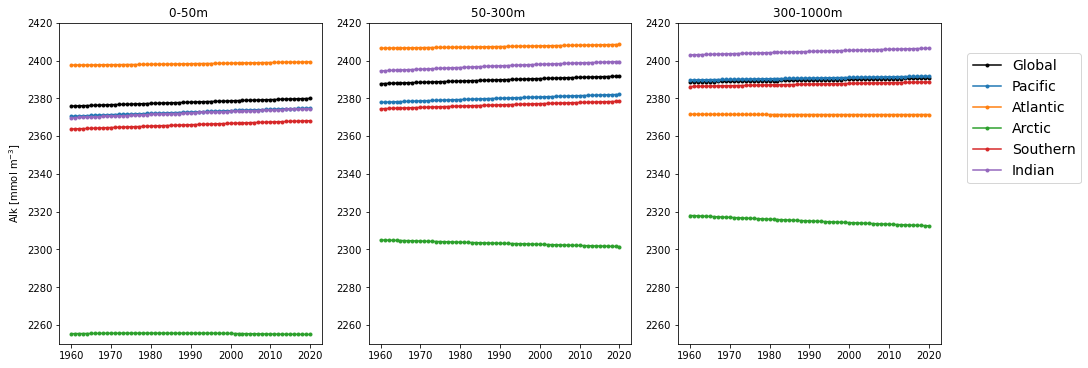

In [7]:
!jupyter nbconvert --to=python Alk_timeseries_python3.ipynb
from Alk_timeseries_python3 import Alk_timeseries

Alk_timeseries(runid,resultpath,savepath,mesh,first_year,last_year,savefig=savefig,regional='all')

### 3.2.2 Export production

In [ ]:
!jupyter nbconvert --to=python EP_timeseries_python3.ipynb
from EP_timeseries_python3 import EP_timeseries

EP_timeseries(runid,resultpath,savepath,mesh,first_year,last_year,savefig=savefig,mask="Global Ocean")

# 4. Carbonate system<a class="anchor" id="BGCPRO"></a>

## 4.1 Maps<a class="anchor" id="CARBSMAPS"></a>

### 4.1.1 DIC<a class="anchor" id="DICMAP"></a>

In [ ]:
!jupyter nbconvert --to=python ../GlobalAssessment/DIC_Glodap_Comparison_python3.ipynb
!jupyter nbconvert --to=python ../GlobalAssessment/load_interp_GLODAP_python3.ipynb

from DIC_Glodap_Comparison_python3 import DICcomp

DICcomp(runid,resultpath,savepath,mesh,ncfileDIC,first_year_maps,last_year,mapproj=mapproj,savefig=savefig,
                 layerwise=layerwise, Taylor=False, cmap = cmo.cm.tempo_r, cmap_extension = 'both')

### 4.1.2 Alk<a class="anchor" id="ALKMAP"></a>

In [ ]:
!jupyter nbconvert --to=python ../GlobalAssessment/Alk_Glodap_Comparison_python3.ipynb

from Alk_Glodap_Comparison_python3 import Alkcomp

Alkcomp(runid,resultpath,savepath,mesh,ncfileAlk,first_year_maps,last_year,mapproj=mapproj,savefig=savefig,
                 layerwise=layerwise,Taylor=False,cmap = cmo.cm.tempo_r)

### 4.1.2b Alk Surface (top 10m)

[NbConvertApp] Converting notebook ../GlobalAssessment/Alk_Glodap_Comparison_python3.ipynb to python
[NbConvertApp] Writing 15996 bytes to ../GlobalAssessment/Alk_Glodap_Comparison_python3.py
***
Loading GLODAP file: /work/ollie/ogurses/input/corrected_input/GLODAPv2.2016b.TAlk_mmol.nc
***
***
Depth greater in FESOM (-6125.0) than in GLODAP (-5500.0)
Please consider choosing max depth level 43 with max depth at -5275.0!
***


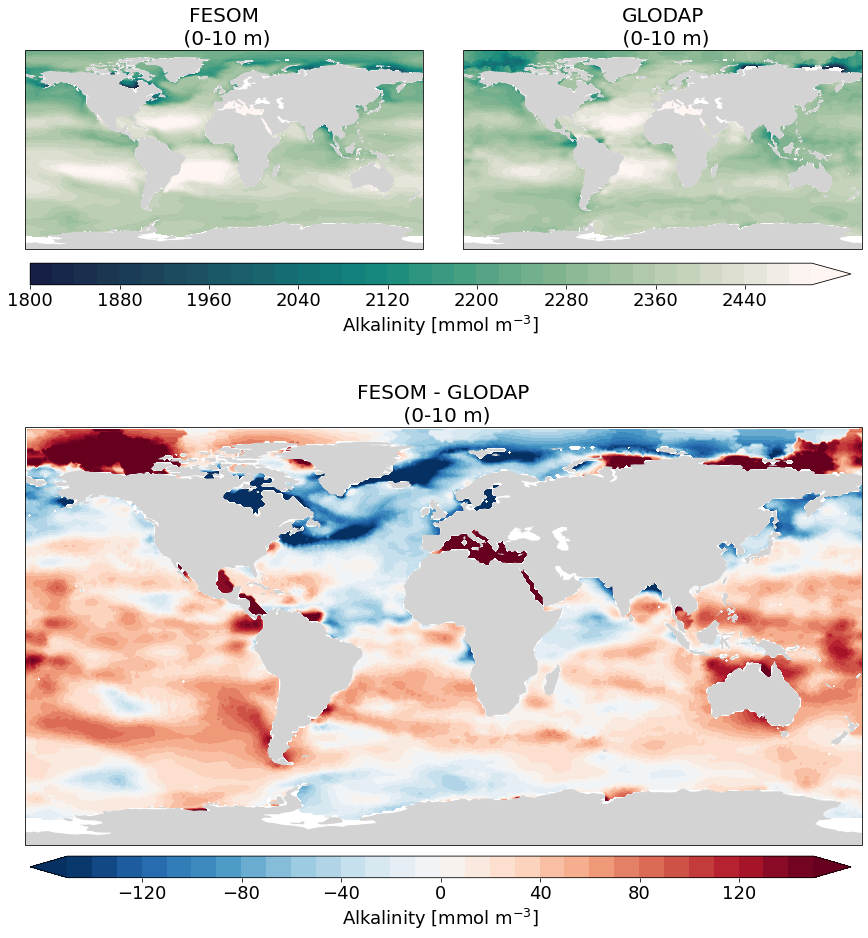

In [5]:
!jupyter nbconvert --to=python ../GlobalAssessment/Alk_Glodap_Comparison_python3.ipynb

from Alk_Glodap_Comparison_python3 import Alkcomp

Alkcomp(runid,resultpath,savepath,mesh,ncfileAlk,first_year_maps,last_year,mapproj=mapproj,savefig=savefig,
                 layerwise=layerwise,Taylor=False,cmap = cmo.cm.tempo_r, depth_limit=10)

### 4.1.2c Alk Surface CMIP6-style (top 10m)

[NbConvertApp] Converting notebook Alk_Glodap_Comparison_surface_CMIP6_style.ipynb to python
[NbConvertApp] Writing 15786 bytes to Alk_Glodap_Comparison_surface_CMIP6_style.py
[NbConvertApp] Converting notebook Alk_Glodap_Comparison_surface_CMIP6_style.ipynb to python
[NbConvertApp] Writing 15786 bytes to Alk_Glodap_Comparison_surface_CMIP6_style.py
***
Loading GLODAP file: /work/ollie/ogurses/input/corrected_input/GLODAPv2.2016b.TAlk_mmol.nc
***
***
Depth greater in FESOM (-6125.0) than in GLODAP (-5500.0)
Please consider choosing max depth level 43 with max depth at -5275.0!
***
Alkalinity as mean over depth 
with max layer depth = 15.0 
(level depth = 10.0m, mesh index 2)

Plotting Alkalinity as mean over depth
FESOM min = 914.67333984375, max = 3237.88330078125
Glodap min = 1078.622807136302, max = 2707.2524515819296


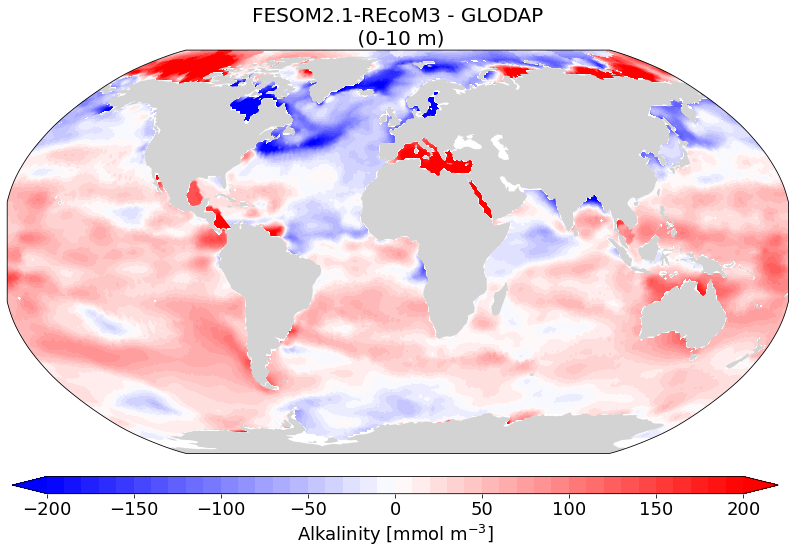

In [4]:
!jupyter nbconvert --to=python Alk_Glodap_Comparison_surface_CMIP6_style.ipynb
from Alk_Glodap_Comparison_surface_CMIP6_style import Alkcomp_surface

Alkcomp_surface(runid,resultpath,savepath,mesh,ncfileAlk,first_year_maps,last_year,mapproj='rob',savefig=savefig,
                 layerwise=layerwise,cmap = cm.bwr, depth_limit=10)

### 4.1.3 pCO2<a class="anchor" id="PCO2MAP"></a>

In [ ]:
!jupyter nbconvert --to=python ../GlobalAssessment/pCO2SOCAT_python3.ipynb
!jupyter nbconvert --to=python ../GlobalAssessment/load_interp_SOCAT_python3.ipynb

from pCO2SOCAT_python3 import pCO2comp

pCO2comp(runid,resultpath,savepath,mesh,ncfilepCO2,first_year,last_year,
                mapproj=mapproj, Taylor=False,
                savefig=savefig)

## 4.3 Profiles<a class="anchor" id="CARBSPRO"></a>

### 4.3.1 DIC/Alk profiles

In [ ]:
!jupyter nbconvert --to=python ../GlobalAssessment/Carbs_profiles_python3.ipynb

from Carbs_profiles_python3 import Carbs_profile

Carbs_profile(runid,resultpath,savepath,mesh,ncfileAlk,ncfileDIC,first_year_maps,last_year,
                 savefig=True, regional=False)

### 4.3.2 DIC/Alk profiles upper ocean (top 200m)

In [ ]:
!jupyter nbconvert --to=python Carbs_profiles_python3_upper_ocean.ipynb

from Carbs_profiles_python3_upper_ocean import Carbs_profile

Carbs_profile(runid,resultpath,savepath,mesh,ncfileAlk,ncfileDIC,first_year_maps,last_year,
                 savefig=savefig, regional=False)

### 4.3.3 Global profile of Alk bias to Glodap

[NbConvertApp] WARNING | pattern 'Alk_bias_profile_python3.ipynb' matched no files
This application is used to convert notebook files (*.ipynb) to various other
formats.


Options
-------

Arguments that take values are actually convenience aliases to full
Configurables, whose aliases are listed on the help line. For more information
on full configurables, see '--help-all'.

--debug
    set log level to logging.DEBUG (maximize logging output)
--generate-config
    generate default config file
-y
    Answer yes to any questions instead of prompting.
--execute
    Execute the notebook prior to export.
--allow-errors
    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too.
--stdin
    read a single notebook file from stdin. Write the resulting notebook with default basename 'notebook.*'
--stdout
    Write notebook ou

***
Loading GLODAP file: /work/ollie/ogurses/input/corrected_input/GLODAPv2.2016b.TAlk_mmol.nc
***
***
Depth greater in FESOM (-6125.0) than in GLODAP (-5500.0)
Please consider choosing max depth level 43 with max depth at -5275.0!
***


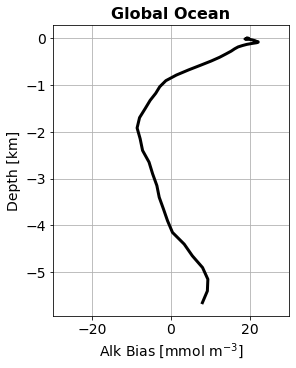

In [5]:
!jupyter nbconvert --to=python Alk_bias_profile_python3.ipynb
from Alk_bias_profile_python3 import Carbs_profile

Carbs_profile(runid,resultpath,savepath,mesh,ncfileAlk,ncfileDIC,first_year_maps,last_year,
                 savefig=True, regional=False)